In [1]:
import glob
import pandas as pd
from zedstat import zedstat
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def _process_roc(questions, files, base_fpr=np.linspace(0, 1, 101)):
    from scipy.spatial import ConvexHull
    from scipy.interpolate import interp1d
    from scipy.interpolate import UnivariateSpline

    tprs = []

    for i, df in enumerate(files):
        tpr = pd.read_csv(df).query("questions==@questions")["tpr"]
        fpr = pd.read_csv(df).query("questions==@questions")["fpr"]
        fpr_i = fpr.drop_duplicates(keep="last")
        tpr_i = tpr.loc[fpr_i.index.values]
        interp = UnivariateSpline(fpr_i, tpr_i, k=min(len(fpr_i) - 1, 2))
        tpr = np.interp(base_fpr, fpr, tpr)
        tpr = interp(base_fpr)
        #tpr[0] = 0
        tpr[-1] = 1
        tprs.append(tpr)

    tprs = np.array(tprs)
    mean_tprs = np.median(tprs, axis=0)
    std = tprs.std(axis=0)

    tprs_upper = np.minimum(mean_tprs + std, 1)
    tprs_lower = mean_tprs - std

    rf = pd.DataFrame(
        {
            "mean": mean_tprs,
            "lower": tprs_lower,
            "upper": tprs_upper,
            "base_fpr": base_fpr,
        }
    ).clip(lower=0, upper=1)

    return rf

In [3]:
pd.concat([pd.read_csv(df) for df in glob.glob("rf_auc_res/roc_df_rf__random_order*.csv")])[
    "questions"
].drop_duplicates().sort_values()

0        1
5        6
19      11
41      16
59      21
63      26
67      31
71      36
75      41
79      46
83      51
87      56
91      61
95      66
99      71
103     76
107     81
111     86
115     91
119     96
123    101
Name: questions, dtype: int64

In [4]:
r = [pd.read_csv(df) for df in glob.glob("rf_auc_res/roc_df_rf__random_order*.csv")]

In [5]:
r[0].query("questions==36")

,fpr,tpr,threshold,questions
71,0.0,0.0000,1.871668,36
72,0.0,0.0625,0.871668,36
73,0.0,1.0000,0.635741,36
74,1.0,1.0000,0.074110,36


In [30]:
fpr_i

56    0.0
57    1.0
Name: fpr, dtype: float64

In [31]:
df

,fpr,tpr,threshold,questions
51,0.0,0.000000,1.858458,31
52,0.0,0.047619,0.858458,31
53,0.0,0.142857,0.852724,31
54,0.0,0.190476,0.848965,31
55,0.0,0.285714,0.845862,31
56,0.0,1.000000,0.487505,31
57,1.0,1.000000,0.095273,31


In [36]:
from scipy.spatial import ConvexHull

<AxesSubplot:xlabel='index'>

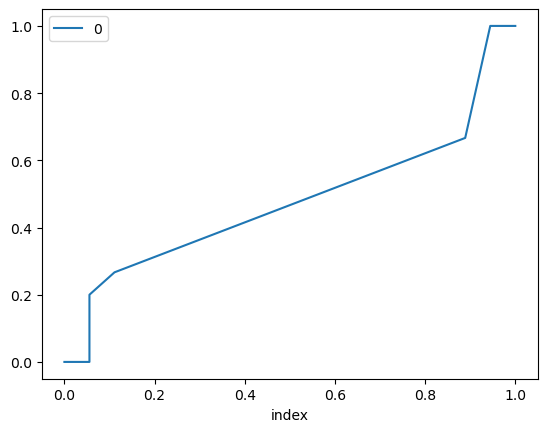

In [42]:
rf_.sort_values(by="index").plot(x="index", y=0)

In [59]:
np.array([base_fpr, tpr]).T

array([[0.        , 0.11457107],
       [0.01      , 0.1201641 ],
       [0.02      , 0.12581471],
       [0.03      , 0.13152289],
       [0.04      , 0.13728866],
       [0.05      , 0.14311201],
       [0.06      , 0.14899295],
       [0.07      , 0.15493146],
       [0.08      , 0.16092756],
       [0.09      , 0.16698123],
       [0.1       , 0.17309249],
       [0.11      , 0.17926133],
       [0.12      , 0.18548775],
       [0.13      , 0.19177175],
       [0.14      , 0.19811333],
       [0.15      , 0.20451249],
       [0.16      , 0.21096924],
       [0.17      , 0.21748357],
       [0.18      , 0.22405547],
       [0.19      , 0.23068496],
       [0.2       , 0.23737203],
       [0.21      , 0.24411668],
       [0.22      , 0.25091892],
       [0.23      , 0.25777873],
       [0.24      , 0.26469613],
       [0.25      , 0.2716711 ],
       [0.26      , 0.27870366],
       [0.27      , 0.2857938 ],
       [0.28      , 0.29294152],
       [0.29      , 0.30014682],
       [0.

In [50]:
pts

array([[0.        , 0.        ],
       [0.        , 0.05555556],
       [0.2       , 0.05555556],
       [0.2       , 0.11111111],
       [0.26666667, 0.11111111],
       [0.26666667, 0.22222222],
       [0.6       , 0.55555556],
       [0.6       , 0.66666667],
       [0.6       , 0.77777778],
       [0.66666667, 0.77777778],
       [0.66666667, 0.88888889],
       [0.86666667, 0.88888889],
       [0.93333333, 0.88888889],
       [1.        , 0.94444444],
       [1.        , 1.        ]])

In [97]:
df

,fpr,tpr,threshold,questions
50,0.000000,0.000000,1.856380,31
51,0.000000,0.045455,0.856380,31
52,0.000000,0.545455,0.757258,31
53,0.000000,0.636364,0.755727,31
54,0.000000,0.727273,0.738141,31
55,0.090909,0.727273,0.734791,31
56,0.090909,0.818182,0.677402,31
57,0.181818,0.818182,0.666800,31
58,0.181818,0.909091,0.656093,31
59,0.272727,0.909091,0.648460,31


In [6]:
def smooth(
    raw_df,
    STEP=0.0001,
    interpolate=True,
    convexify=True,
    fprcol="fpr",
    order=3,
    tprcol="tpr",
):
    """
    smooth roc curves and update processRoc.df which is accessible using processRoc.get()

    Args:
        STEP (float): smooting step, default 0.0001
        interpolate (bool): if True, interpolate missing values, default True
        convexify (bool): if True, replace ROC with convex hull, default True
    """
    df = raw_df.copy()
    VAR = fprcol
    df_ = df.reset_index()
    DF = pd.concat(
        [
            pd.DataFrame(df_[df_[VAR].between(i, i + STEP)].max()).transpose()
            for i in np.arange(0, 1, STEP)
        ]
    ).set_index(VAR)
    DF = DF.dropna()
    DF.loc[0] = pd.Series([], dtype=float)
    DF.loc[1] = pd.Series([], dtype=float)
    DF.loc[0, "tpr"] = 0
    DF.loc[1, "tpr"] = 1

    DF = DF.sort_index()
    if interpolate:
        return DF
        DF = DF.interpolate(
            limit_direction="both", method="spline", order=min(len(df) - 1, order)
        )
        DF[DF < 0] = 0
        df = DF
    if convexify:
        __convexify(DF, order, fprcol, tprcol)
    return DF

In [7]:
def __convexify(df, order=3, fprcol="fpr", tprcol="tpr"):
    """
    compute convex hull of the roc curve
    """
    # print(df)
    from scipy.spatial import ConvexHull

    if df.index.name == fprcol:
        rf = df
    else:
        if fprcol in df.columns:
            rf = df.set_index(fprcol)  # .drop('threshold',axis=1)
        else:
            raise ("fpr not in columns or index")

    rf = rf.reset_index()
    rf = pd.concat([rf, pd.DataFrame({fprcol: 0, tprcol: 0}, index=[0])])
    rf = pd.concat([rf, pd.DataFrame({fprcol: 1, tprcol: 0}, index=[0])])
    rf = pd.concat([rf, pd.DataFrame({fprcol: 1, tprcol: 1}, index=[0])])

    rf = rf.drop_duplicates()
    rf = rf.sort_values(fprcol)
    rf = rf.sort_values(tprcol)

    pts = rf[[fprcol, tprcol]].values

    # print(pts)

    if len(pts) < order:
        rf_ = rf.copy()
        rf_.columns = [tprcol, fprcol]
        rf_ = rf_.sort_values(fprcol)
        rf_ = rf_.sort_values(tprcol)
        df = rf_.set_index(fprcol).copy()
        return  # df

    hull = ConvexHull(pts)
    rf_ = pd.DataFrame(pts[hull.vertices, 0], pts[hull.vertices, 1]).reset_index()
    rf_.columns = [tprcol, fprcol]
    rf_ = rf_.set_index(fprcol)

    rf_ = rf_.drop(1.0).sort_index()
    rf_.loc[1.0] = 1.0

    df = rf_.copy()
    return df

In [125]:
df = r[1].query("questions==36")
d = smooth(df)

In [135]:
d["tpr"]

fpr
0.000000    0.0
0.058824    1.0
0.588235    1.0
0.823529    1.0
1.000000    1.0
Name: tpr, dtype: float64

In [134]:
d.interpolate(limit_direction="both")

,index,tpr,threshold,questions
fpr,,,,
0.000000,68.0,0.0,0.734002,36.0
0.058824,68.0,1.0,0.734002,36.0
0.588235,69.0,1.0,0.205140,36.0
0.823529,70.0,1.0,0.189266,36.0
1.000000,70.0,1.0,0.189266,36.0


<AxesSubplot:xlabel='fpr'>

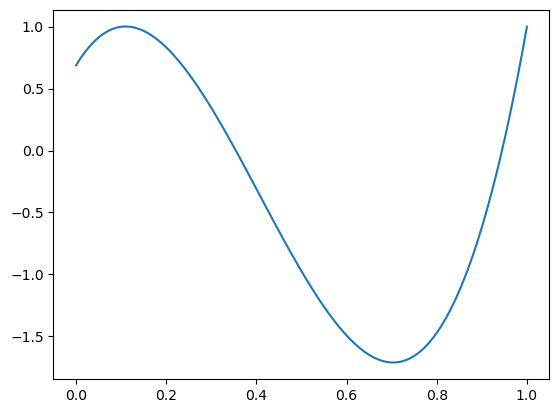

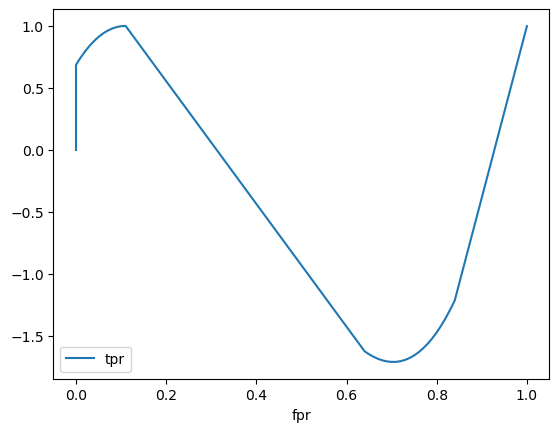

In [10]:
from scipy.interpolate import UnivariateSpline
df = r[1].query("questions==11")
base_fpr = np.linspace(0, 1, 101)
tpr = df["tpr"]
fpr = df["fpr"]


fpr_i = fpr.drop_duplicates(keep="last")
tpr_i = tpr.loc[fpr_i.index.values]
interp = UnivariateSpline(fpr_i, tpr_i, k=min(len(fpr_i) - 1, 3))
tpr = np.interp(base_fpr, fpr, tpr)
tpr = interp(base_fpr)
plt.plot(base_fpr, tpr)
__convexify(pd.DataFrame({"fpr": base_fpr, "tpr": tpr})).plot()

,tpr
fpr,
0.00,0.000000
0.00,0.725587
0.01,0.737575
0.02,0.749275
0.03,0.760691
...,...
0.88,1.018323
0.89,1.016825
0.90,1.015311


In [ ]:
pts = df[["fpr", "tpr"]].values
pts = np.array([base_fpr, tpr]).T
hull = ConvexHull(pts)
rf_ = (
    pd.DataFrame(pts[hull.vertices, 0], pts[hull.vertices, 1])
    .reset_index()
    .sort_values(by="index")
    .set_axis(["fpr", "tpr"], axis="columns")
)

# rf_.plot(x="fpr", y="tpr")

In [24]:
interp(base_fpr)

array([-0.0136639 , -0.00336109,  0.00705774,  0.01758894,  0.0282289 ,
        0.03897397,  0.04982053,  0.06076494,  0.07180358,  0.08293281,
        0.09414901,  0.10544853,  0.11682776,  0.12828305,  0.13981078,
        0.15140732,  0.16306904,  0.1747923 ,  0.18657348,  0.19840894,
        0.21029505,  0.22222818,  0.2342047 ,  0.24622099,  0.2582734 ,
        0.2703583 ,  0.28247207,  0.29461108,  0.30677169,  0.31895028,
        0.3311432 ,  0.34334684,  0.35555756,  0.36777172,  0.3799857 ,
        0.39219587,  0.4043986 ,  0.41659025,  0.42876719,  0.4409258 ,
        0.45306243,  0.46517347,  0.47725528,  0.48930423,  0.50131668,
        0.51328901,  0.52521758,  0.53709877,  0.54892894,  0.56070447,
        0.57242172,  0.58407705,  0.59566685,  0.60718747,  0.61863529,
        0.63000668,  0.641298  ,  0.65250563,  0.66362593,  0.67465527,
        0.68559002,  0.69642655,  0.70716123,  0.71779043,  0.72831052,
        0.73871786,  0.74900882,  0.75917978,  0.76922711,  0.77

In [15]:
df

,fpr,tpr,threshold,questions
10,0.000000,0.000000,1.889353,16
11,0.071429,0.052632,0.889353,16
12,0.142857,0.052632,0.730034,16
13,0.142857,0.105263,0.686001,16
14,0.214286,0.157895,0.626146,16
15,0.214286,0.263158,0.553762,16
16,0.285714,0.315789,0.483362,16
17,0.785714,0.842105,0.439066,16
18,0.857143,0.894737,0.422131,16
19,0.857143,0.947368,0.401864,16


<AxesSubplot:xlabel='fpr'>

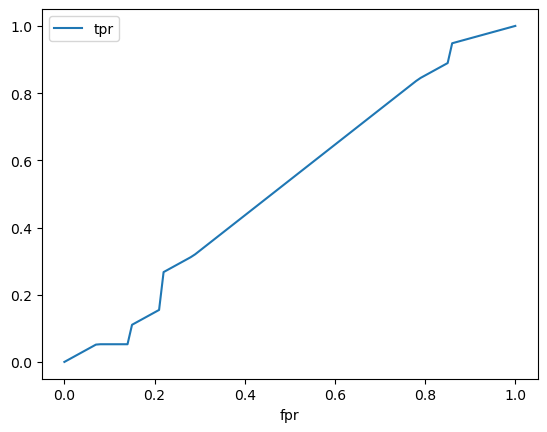

In [20]:
pd.DataFrame({"fpr": base_fpr, "tpr": tpr}).plot(x="fpr", y="tpr")

In [93]:
_process_roc(36, files=glob.glob("rf_auc_res/roc_df_rf_2023-07-23 2*"))

,mean,lower,upper,base_fpr
0,0.000000,0.000000,0.0,0.00
1,0.891844,0.721361,1.0,0.01
2,0.899500,0.748763,1.0,0.02
3,0.907128,0.774151,1.0,0.03
4,0.914395,0.796588,1.0,0.04
...,...,...,...,...
96,1.000000,0.910305,1.0,0.96
97,1.000000,0.930338,1.0,0.97
98,1.000000,0.950488,1.0,0.98
99,1.000000,0.969987,1.0,0.99


In [8]:
_process_roc(36, files=glob.glob("rf_auc_res/roc_df_rf_2023-07-23 2*")).to_csv(
    "roc36.csv", index=False
)

In [13]:
rdf

,mean,lower,upper,base_fpr
0,0.000000,0.000000,0.000000,0.00
1,0.289291,0.038951,0.539631,0.01
2,0.309520,0.062972,0.556069,0.02
3,0.329478,0.086561,0.572396,0.03
4,0.347493,0.108050,0.586937,0.04
...,...,...,...,...
96,1.000000,0.989271,1.000000,0.96
97,1.000000,0.988180,1.000000,0.97
98,1.000000,0.980883,1.000000,0.98
99,0.997271,0.974276,1.000000,0.99


Text(0.5, 0, 'False Positive Rate')

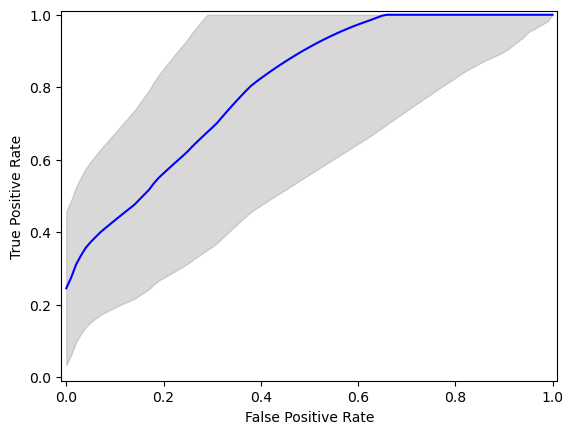

In [18]:
rdf = _process_roc(6, files=glob.glob("rf_auc_res/roc_df_rf__random_order*"))

plt.plot(rdf["base_fpr"], rdf["mean"], "b")
plt.fill_between(rdf["base_fpr"], rdf["lower"], rdf["upper"], color="grey", alpha=0.3)

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [27]:
DF

,mean,lower,upper,tpr
base_fpr,,,,
0.00,NaN,NaN,NaN,0.0
0.01,0.154346,0.050907,0.257786,NaN
0.01,0.154346,0.050907,0.257786,NaN
0.02,0.155580,0.051811,0.259349,NaN
0.02,0.155580,0.051811,0.259349,NaN
...,...,...,...,...
0.96,0.988494,0.957016,1.000000,NaN
0.97,0.988494,0.957016,1.000000,NaN
0.98,0.988494,0.957016,1.000000,NaN


In [28]:
VAR = "fpr"
STEP = 0.0001
df_ = rdf[["base_fpr", "mean"]].set_axis(["fpr", "tpr"], axis="columns")
DF = pd.concat(
    [
        pd.DataFrame(df_[df_[VAR].between(i, i + STEP)].max()).transpose()
        for i in np.arange(0, 1, STEP)
    ]
).set_index(VAR)
DF = DF.dropna()
DF.loc[0] = pd.Series([], dtype=float)
DF.loc[1] = pd.Series([], dtype=float)
DF.loc[0, "tpr"] = 0
DF.loc[1, "tpr"] = 1

DF = DF.sort_index()
DF = DF.interpolate(limit_direction="both", method="spline", order=3)
DF[DF < 0] = 0
DF

,tpr
fpr,
0.00,0.000000
0.01,0.154346
0.01,0.154346
0.02,0.155580
0.02,0.155580
...,...
0.96,0.988494
0.97,0.988494
0.98,0.988494


<AxesSubplot:xlabel='fpr'>

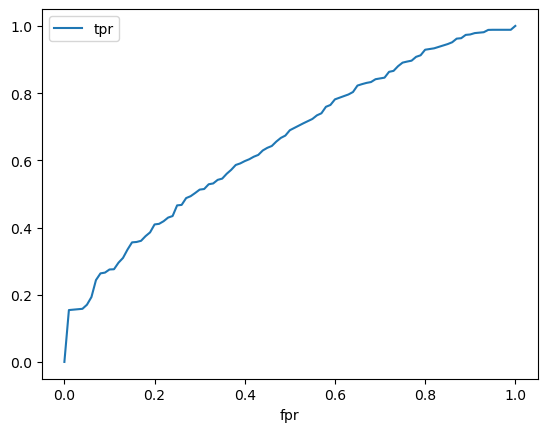

In [29]:
DF.plot()

In [6]:
rf = rdf
fprcol = "base_fpr"
tprcol = "mean"

In [7]:
pts = rf[[fprcol, tprcol]].values

# print(pts)


hull = ConvexHull(pts)
rf_ = pd.DataFrame(pts[hull.vertices, 0], pts[hull.vertices, 1]).reset_index()
rf_.columns = [tprcol, fprcol]
rf_ = rf_.set_index(fprcol)

rf_ = rf_.drop(1.0).sort_index()
rf_.loc[1.0] = 1.0

In [13]:
rf_.reset_index()

,base_fpr,mean
0,0.00,0.000000
1,0.01,0.779803
2,0.08,0.949354
3,0.13,0.981983
4,0.17,0.995658
5,0.19,0.997619
6,0.22,1.000000
7,1.00,1.000000


In [46]:
rdf

,mean,lower,upper,base_fpr
0,0.000000,0.000000,0.000000,0.00
1,0.122072,0.000000,0.253890,0.01
2,0.124976,0.000000,0.257246,0.02
3,0.127880,0.000000,0.261025,0.03
4,0.130784,0.000000,0.265217,0.04
...,...,...,...,...
96,0.984942,0.947791,1.000000,0.96
97,0.985465,0.948915,1.000000,0.97
98,0.985989,0.949942,1.000000,0.98
99,0.986512,0.950867,1.000000,0.99


In [19]:
questions = 31
dfs = [
    pd.read_csv(df).query("questions==@questions")
    for df in glob.glob("rf_auc_res/roc_df_rf__random_order*")
]

In [31]:
dfs[5]

,fpr,tpr,threshold,questions
70,0.000000,0.000000,1.745702,31
71,0.000000,0.052632,0.745702,31
72,0.000000,0.894737,0.581317,31
73,0.071429,0.894737,0.564186,31
74,0.071429,1.000000,0.532451,31
75,1.000000,1.000000,0.141856,31


In [32]:
zt = zedstat.processRoc(
    dfs[5],
    order=3,
    total_samples=1000,
    positive_samples=100,
    alpha=0.05,
    prevalence=0.3,
)

zt.smooth(STEP=0.01)
zt.allmeasures(interpolate=False)
zt.usample(precision=3)
zt.getBounds()

zt.auc()

error: (m>k) failed for hidden m: fpcurf0:m=1

In [28]:
zt.df

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,NaN,0.700000,0.700000,NaN,1.000000,1.708602
0.001,0.012138,NaN,0.702947,0.703220,NaN,0.988111,1.690390
0.002,0.024276,NaN,0.705894,0.706441,NaN,0.976222,1.672178
0.003,0.036415,NaN,0.708841,0.709661,NaN,0.964332,1.653966
0.004,0.048553,NaN,0.711788,0.712881,NaN,0.952443,1.635753
...,...,...,...,...,...,...,...
0.996,1.000000,0.301073,0.302796,1.000000,1.005809,0.000000,0.258877
0.997,1.000000,0.300805,0.302097,1.000000,1.004357,0.000000,0.258440
0.998,1.000000,0.300537,0.301398,1.000000,1.002904,0.000000,0.258002


Text(0, 0.5, 'tpr')

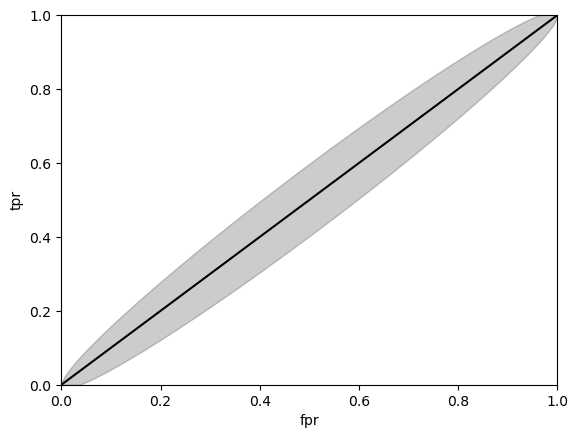

In [30]:
fig, ax = plt.subplots()
ax = zt.get().tpr.plot(ax=ax, color="k")
plt.fill_between(
    x=zt.get().index, y1=zt.df_lim["U"].tpr, y2=zt.df_lim["L"].tpr, color="k", alpha=0.2
)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_ylabel("tpr")

In [9]:
len(range(1, 102, 5))

21

In [26]:
roc

,fpr,tpr,threshold,questions,curve
51,0.0000,0.000000,1.858458,31,0
52,0.0000,0.047619,0.858458,31,0
53,0.0000,0.142857,0.852724,31,0
54,0.0000,0.190476,0.848965,31,0
55,0.0000,0.285714,0.845862,31,0
...,...,...,...,...,...
62,0.1250,0.941176,0.715739,31,29
63,0.1875,1.000000,0.701711,31,29
64,0.6875,1.000000,0.088492,31,29
65,0.8750,1.000000,0.079944,31,29


In [24]:
roc

,fpr,tpr,threshold,questions
51,0.0000,0.000000,1.858458,31
52,0.0000,0.047619,0.858458,31
53,0.0000,0.142857,0.852724,31
54,0.0000,0.190476,0.848965,31
55,0.0000,0.285714,0.845862,31
...,...,...,...,...
62,0.1250,0.941176,0.715739,31
63,0.1875,1.000000,0.701711,31
64,0.6875,1.000000,0.088492,31
65,0.8750,1.000000,0.079944,31


In [ ]:
tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect("equal", "datalim")

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, "b")
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color="grey", alpha=0.3)

plt.plot([0, 1], [0, 1], "r--")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()